In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

In [13]:
print(df_market_data.columns)

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


### Prepare the Data

In [15]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data[['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 
                                       'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 
                                       'price_change_percentage_1y']])

In [16]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 
                                              'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 
                                              'price_change_percentage_1y'])

# Reset the index to make 'coin_id' a regular column again
scaled_df['coin_id'] = df_market_data.index

# Set the coin_id column as index
scaled_df.set_index('coin_id', inplace=True)

# Display the scaled DataFrame
scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [ ]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [ ]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using `scaled_df`
    kmeans.fit(scaled_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Display the inertia values
print(inertia_values)



[287.0, 212.1233420748626, 170.19357087970295, 79.02243535120975, 71.0979135124442, 66.1088267804475, 54.48812315624117, 43.224692666580424, 32.86088447122681, 28.404884636873092, 24.1161984214092]


In [ ]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,  
    'inertia': inertia_values 
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


elbow_df

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,170.193571
3,4,79.022435
4,5,71.097914
5,6,66.108827
6,7,54.488123
7,8,43.224693
8,9,32.860884
9,10,28.404885


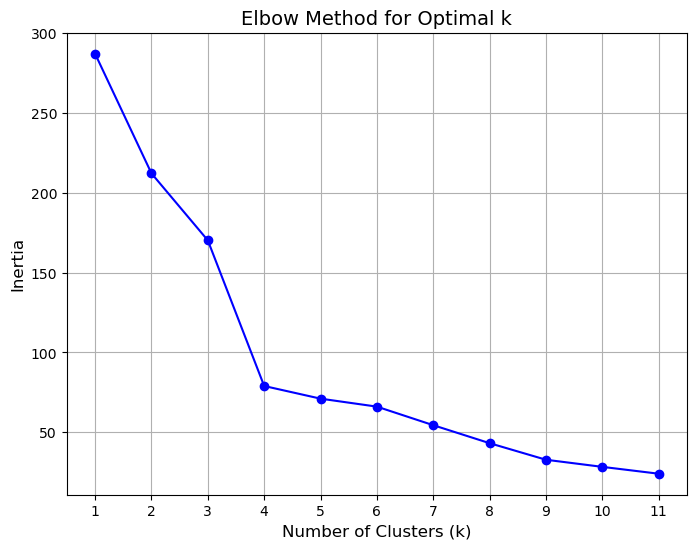

In [58]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.grid(True)
plt.xticks(range(1, 12))
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** (4) is the best value for `k'. 

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [24]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=42)

In [34]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(scaled_df)

KMeans(n_clusters=4, random_state=42)

In [35]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
clusters = kmeans.predict(scaled_df)

# Print the resulting array of cluster values.
print(clusters)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [53]:
# Create a copy of the scaled DataFrame
df_scaled_with_clusters = scaled_df.copy()


In [54]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_scaled_with_clusters['predicted_cluster'] = clusters


# Display the copy of the scaled DataFrame
df_scaled_with_clusters


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,0
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,0
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,0
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,0


In [ ]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
# Add the crypto names to the scaled DataFrame (assuming 'coin_id' is the original DataFrame's index)
import hvplot.pandas

# Create a scatter plot using hvPlot
scatter_plot = df_scaled_with_clusters.hvplot.scatter(
    x="price_change_percentage_24h",  
    y="price_change_percentage_7d", 
    c="predicted_cluster",                    
    hover_cols=["coin_id"],          
    size=8,                          
    cmap='viridis',                  
    title="Cryptocurrency Clusters (24h vs 7d Price Change)",
    xlabel="Price Change Percentage (24h)", 
    ylabel="Price Change Percentage (7d)"   
)

# Display the plot
scatter_plot


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted_cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [60]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [61]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca.fit_transform(scaled_df)

# View the scaled PCA data
print(pca_data)

[[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]
 [-0.51653377  1.38837748  0.80407131]
 [-0.45071134  0.51769912  2.84614316]
 [-0.34559977  0.72943939  1.47801284]
 [-0.64946792  0.43216514  0.60030286]
 [-0.75901394 -0.20119979 -0.21765292]
 [-0.24819846 -1.37625159 -1.46202571]
 [-0.43840762 -0.17533654 -0.6633884 ]
 [-0.69342533 -0.47381462 -0.52759693]
 [ 0.06049915  2.90940385  1.49857131]
 [-0.39335243 -0.10819197 -0.01275608]
 [-0.79617564 -0.49440875  1.08281169]
 [ 0.06407452 -1.26982514 -1.09882928]
 [-0.48901506 -0.73271912 -0.06254323]
 [-0.3062723   0.70341515  1.71422359]
 [-0.51352775 -0.14280239 -0.65656583]
 [-0.36212044 -0.98691441 -0.72875232]
 [-0.60426463  0.82739764  0.43931594]
 [-0.4132956  -0.67411527 -1.07662834]
 [-0.40748304 -0.21250655 -0.35142563]
 [ 0.60897382  0.56353212 -1.14874159]
 [-0.45021114 -0.15101945

In [63]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.

explained_variance = pca.explained_variance_ratio_
print(explained_variance)



[0.3719856  0.34700813 0.17603793]


In [65]:
total_explained_variance = explained_variance.sum()

print(total_explained_variance)


0.8950316570309842


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8950316570309842

In [66]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])


# Copy the crypto names from the original scaled DataFrame
pca_df['coin_id'] = scaled_df.index


# Set the coin_id column as index
pca_df.set_index('coin_id', inplace=True)


# Display the scaled PCA DataFrame
pca_df

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [67]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [ ]:
# Create an empty list to store the inertia values
inertia_values2 = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12): 
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using `pca_df`
    kmeans.fit(pca_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values2.append(kmeans.inertia_)

# Display the inertia values
print(inertia_values2)


[256.8740855678926, 182.3395300777565, 140.43183298408368, 49.66549665179738, 42.05190109791727, 31.74900524438903, 28.031869172552764, 19.45174720604136, 13.814081971558103, 10.63064757387097, 10.120242629957763]


In [90]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data2 = {
    'k': range(1, 12),  # k-values from 1 to 11
    'inertia': inertia_values  # List of inertia values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df2 = pd.DataFrame(elbow_data2)
elbow_df2


,k,inertia
0,1,256.874086
1,2,182.339530
2,3,140.431833
3,4,49.665497
4,5,42.051901
5,6,31.749005
6,7,28.031869
7,8,19.451747
8,9,13.814082
9,10,10.630648


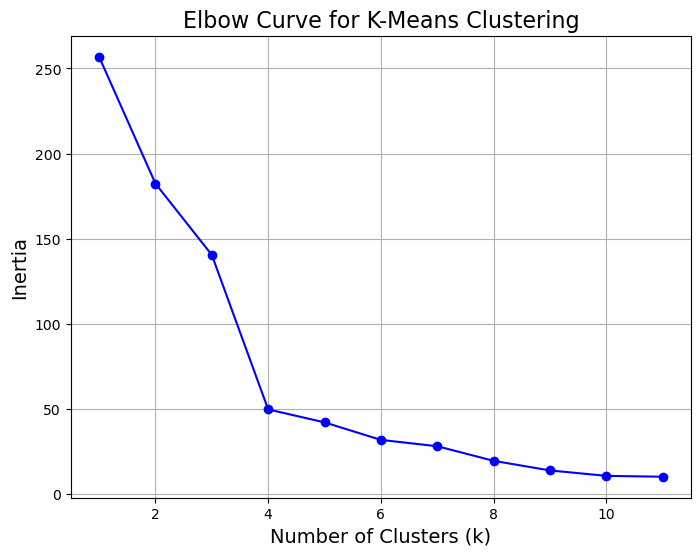

In [91]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k'], elbow_df2['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for K-Means Clustering', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, the best value for k is the same for both the original data and the PCA data, which is 4. 

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [82]:
# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=4, random_state=42)

In [83]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_data)


KMeans(n_clusters=4, random_state=42)

In [84]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
cluster_labels = kmeans.predict(pca_df)

# Print the resulting array of cluster values
print(cluster_labels)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


/opt/anaconda3/envs/dev/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [85]:
# Create a copy of the scaled PCA DataFrame
df_pca_copy = pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_copy['Cluster'] = kmeans_pca.labels_

# Display the copy of the scaled PCA DataFrame
df_pca_copy


,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0
binancecoin,-0.516534,1.388377,0.804071,0
chainlink,-0.450711,0.517699,2.846143,0
cardano,-0.345600,0.729439,1.478013,0
litecoin,-0.649468,0.432165,0.600303,0


In [ ]:
# Create a scatter plot using hvPlot by setting
# x="PC1" and y="PC2".
# Color the graph points with the labels found using K-Means and
# add the crypto name in the hover_cols parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot = df_pca_copy.hvplot.scatter(
    x='PC1',  
    y='PC2',  
    c='Cluster',  
    hover_cols=['coin_id'],  
    title="Cryptocurrency Clusters Based on PCA",
    colorbar=True 
)

scatter_plot


:Scatter   [PC1]   (PC2,Cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

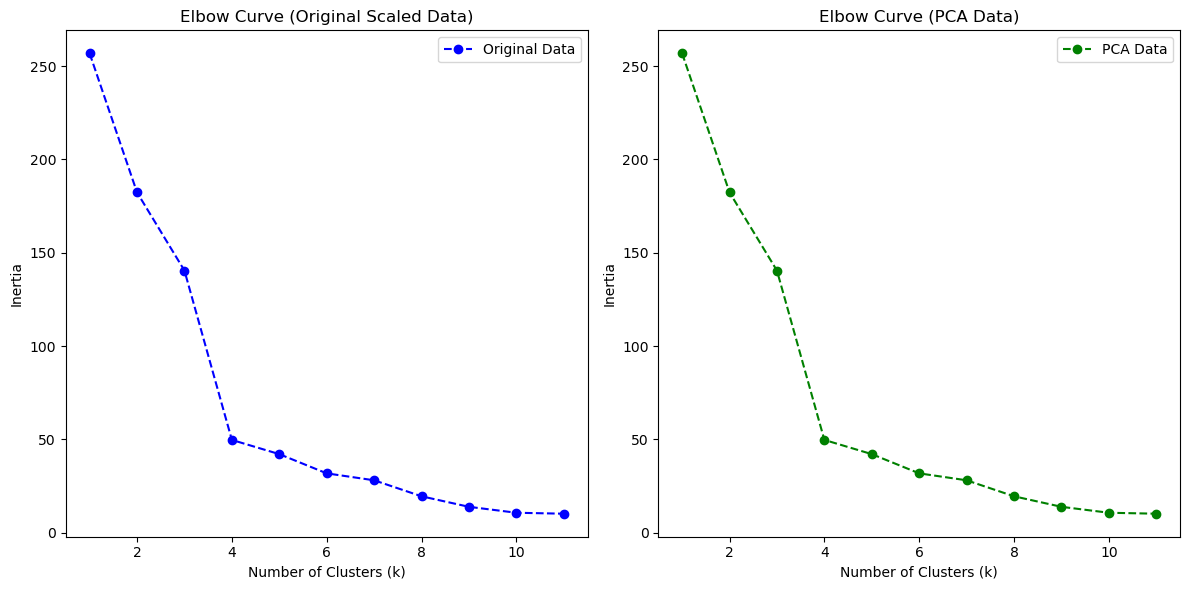

In [ ]:
# Composite plot to contrast the Elbow curves
# YOUR CODE HERE!

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 12), inertia_values, marker='o', color='blue', linestyle='--', label="Original Data")
plt.title('Elbow Curve (Original Scaled Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, 12), inertia_values2, marker='o', color='green', linestyle='--', label="PCA Data")
plt.title('Elbow Curve (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

scatter_plot_1 = df_scaled_with_clusters.hvplot.scatter(
    x="price_change_percentage_24h",  
    y="price_change_percentage_7d",   
    c="predicted_cluster",                      
    hover_cols=["coin_id"],          
    size=8,                           
    cmap='viridis',                  
    title="Cryptocurrency Clusters (24h vs 7d Price Change)",
    xlabel="Price Change Percentage (24h)",  
    ylabel="Price Change Percentage (7d)"   
)


scatter_plot_2 = df_pca_copy.hvplot.scatter(
    x='PC1',  
    y='PC2',  
    c='Cluster',  
    hover_cols=['coin_id'],  
    title="Cryptocurrency Clusters Based on PCA",
    colorbar=True 
)

scatter_plot_1 + scatter_plot_2


:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted_cluster,coin_id)
   .Scatter.II :Scatter   [PC1]   (PC2,Cluster,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features for clustering makes it easier to visualize but can reduce the accuracy of the clusters by losing important data. It's a trade-off between simplicity and detail.